In [1]:
from math import sqrt
from numpy import concatenate
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
df=pd.read_csv("138_Temp.csv")

In [3]:
df.head()

,Date,Temperature,Humidity,Outside Temperature,Previous Date,Temperature on Previous day,2 days before Date,Temperature 2 days before
0,1/15/2020 1:44,71.2,78.09,68,1/14/2020 1:44,69.6,1/13/2020 1:44,68.3
1,1/15/2020 3:44,71.1,80.14,66,1/14/2020 3:44,69.6,1/13/2020 3:44,68.1
2,1/15/2020 5:44,71.0,81.81,68,1/14/2020 5:44,69.7,1/13/2020 5:44,68.0
3,1/15/2020 7:44,70.4,75.66,72,1/14/2020 7:44,70.4,1/13/2020 7:44,68.5
4,1/15/2020 9:44,71.2,69.49,75,1/14/2020 9:44,71.0,1/13/2020 9:44,68.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 8 columns):
Date                           384 non-null object
Temperature                    384 non-null float64
Humidity                       384 non-null float64
Outside Temperature            384 non-null int64
Previous Date                  384 non-null object
Temperature on Previous day    384 non-null float64
2 days before Date             384 non-null object
Temperature 2 days before      384 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 24.1+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [6]:
df.tail()

,Temperature,Humidity,Outside Temperature,Previous Date,Temperature on Previous day,2 days before Date,Temperature 2 days before
Date,,,,,,,
2020-02-15 15:44:00,67.0,50.02,62,2/14/2020 15:44,70.0,2/13/2020 15:44,71.1
2020-02-15 17:44:00,66.8,51.74,62,2/14/2020 17:44,69.9,2/13/2020 17:44,70.6
2020-02-15 19:44:00,67.0,53.43,63,2/14/2020 19:44,69.0,2/13/2020 19:44,70.2
2020-02-15 21:44:00,67.0,54.65,61,2/14/2020 21:44,68.3,2/13/2020 21:44,69.5
2020-02-15 23:44:00,66.9,56.41,59,2/14/2020 23:44,67.7,2/13/2020 23:44,68.8


In [7]:
df.dropna(inplace=True)

In [8]:
ts=df.loc['1/15/2020':'2/15/2020',['Temperature','Humidity','Outside Temperature','Temperature on Previous day','Temperature 2 days before']]
#ts=pd.concat([df.loc['2/03/2020':'2/07/2020'],df.loc['2/10/2020':'2/14/2020']])[['Temperature','Humidity','Outside Temperature','Temperature on Previous day','Temperature 2 days before']]
ts=pd.DataFrame(ts)
ts.head()

,Temperature,Humidity,Outside Temperature,Temperature on Previous day,Temperature 2 days before
Date,,,,,
2020-01-15 01:44:00,71.2,78.09,68,69.6,68.3
2020-01-15 03:44:00,71.1,80.14,66,69.6,68.1
2020-01-15 05:44:00,71.0,81.81,68,69.7,68.0
2020-01-15 07:44:00,70.4,75.66,72,70.4,68.5
2020-01-15 09:44:00,71.2,69.49,75,71.0,68.9


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


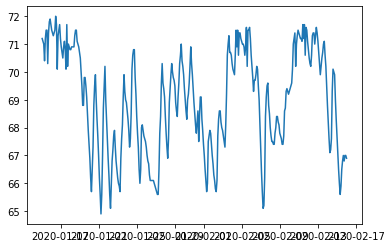

In [9]:
plt.plot(ts['Temperature'])

In [10]:
values=ts.values

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [12]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [13]:
reframed = series_to_supervised(scaled, 12, 1)

In [14]:
reframed.head()

,var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var1(t-11),var2(t-11),var3(t-11),var4(t-11),var5(t-11),...,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
12,0.887324,0.875464,0.804348,0.661972,0.478873,0.873239,0.915479,0.760870,0.661972,0.450704,...,0.957746,0.727894,0.717391,0.901408,0.661972,0.929577,0.765957,0.717391,0.887324,0.661972
13,0.873239,0.915479,0.760870,0.661972,0.450704,0.859155,0.948077,0.804348,0.676056,0.436620,...,0.929577,0.765957,0.717391,0.887324,0.661972,0.915493,0.821199,0.760870,0.873239,0.661972
14,0.859155,0.948077,0.804348,0.676056,0.436620,0.774648,0.828030,0.891304,0.774648,0.507042,...,0.915493,0.821199,0.760870,0.873239,0.661972,0.901408,0.845403,0.760870,0.859155,0.676056
15,0.774648,0.828030,0.891304,0.774648,0.507042,0.887324,0.707593,0.956522,0.859155,0.563380,...,0.901408,0.845403,0.760870,0.859155,0.676056,0.915493,0.747999,0.847826,0.774648,0.774648
16,0.887324,0.707593,0.956522,0.859155,0.563380,0.929577,0.662502,0.956522,0.915493,0.633803,...,0.915493,0.747999,0.847826,0.774648,0.774648,0.929577,0.650010,0.913043,0.887324,0.859155


In [15]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[61,62,63,64]], axis=1, inplace=True)

In [16]:
reframed.tail()

,var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var1(t-11),var2(t-11),var3(t-11),var4(t-11),var5(t-11),...,var2(t-2),var3(t-2),var4(t-2),var5(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t)
379,0.718310,0.232676,0.456522,0.873239,0.859155,0.704225,0.217646,0.347826,0.802817,0.901408,...,0.249658,0.717391,0.619718,0.816901,0.267606,0.291626,0.760870,0.732394,0.859155,0.295775
380,0.704225,0.217646,0.347826,0.802817,0.901408,0.577465,0.221940,0.239130,0.746479,0.943662,...,0.291626,0.760870,0.732394,0.859155,0.295775,0.327542,0.673913,0.718310,0.873239,0.267606
381,0.577465,0.221940,0.239130,0.746479,0.943662,0.478873,0.199883,0.173913,0.647887,0.915493,...,0.327542,0.673913,0.718310,0.873239,0.267606,0.361117,0.673913,0.704225,0.802817,0.295775
382,0.478873,0.199883,0.173913,0.647887,0.915493,0.394366,0.190513,0.195652,0.549296,0.873239,...,0.361117,0.673913,0.704225,0.802817,0.295775,0.394105,0.695652,0.577465,0.746479,0.295775
383,0.394366,0.190513,0.195652,0.549296,0.873239,0.309859,0.188952,0.260870,0.464789,0.816901,...,0.394105,0.695652,0.577465,0.746479,0.295775,0.417919,0.652174,0.478873,0.647887,0.281690


In [17]:
# split into train and test sets
values = reframed.values
n_train = 276
train = values[:n_train, :]
test = values[n_train:, :]

In [18]:
test.shape

(96, 61)

In [19]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape,test_X.shape, train_y.shape,test_y.shape)

(276, 60) (96, 60) (276,) (96,)


In [20]:
# specify the number of lag hours
n_hours = 12
n_features = 5

In [21]:
# split into input and outputs
#n_obs = n_hours * n_features
#train_X, train_y = train[:, :n_obs], train[:, -n_features]
#test_X, test_y = test[:, :n_obs], test[:, -n_features]
#print(train_X.shape,test_X.shape, train_y.shape,test_y.shape)

In [22]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))

In [23]:
print(train_X.shape,test_X.shape, train_y.shape,test_y.shape)

(276, 12, 5) (96, 12, 5) (276,) (96,)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 276 samples, validate on 96 samples
Epoch 1/30
 - 1s - loss: 0.3897 - val_loss: 0.1194
Epoch 2/30
 - 0s - loss: 0.1981 - val_loss: 0.1796
Epoch 3/30
 - 0s - loss: 0.1433 - val_loss: 0.1497
Epoch 4/30
 - 0s - loss: 0.1563 - val_loss: 0.1108
Epoch 5/30
 - 0s - loss: 0.1370 - val_loss: 0.1254
Epoch 6/30
 - 0s - loss: 0.1200 - val_loss: 0.0983
Epoch 7/30
 - 0s - loss: 0.1183 - val_loss: 0.0923
Epoch 8/30
 - 0s - loss: 0.1176 - val_loss: 0.0917
Epoch 9/30
 - 0s - loss: 0.1100 - val_loss: 0.0825
Epoch 10/30
 - 0s - loss: 0.1095 - val_loss: 0.0812
Epoch 11/30
 - 0s - loss: 0.1071 - val_loss: 0.0760
Epoch 12/30
 - 0s - loss: 0.1049 - val_loss: 0.0734
Epoch 13/30
 - 0s - loss: 0.1041 - val_loss: 0.0752
Epoch 14/30
 - 0s - loss: 0.1008 - val_loss: 0.0708
Epoch 15/30
 - 0s - loss: 0.1004 - val_loss: 0.0713
Epoch 16/30
 - 0s - loss: 0.0968 - val_loss: 0.0672
Epoch 17/30


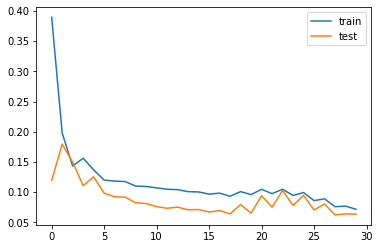

In [24]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=30, batch_size=32, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [25]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1]*test_X.shape[2]))

In [26]:
test_X.shape

(96, 60)

In [27]:
# invert scaling for forecast
testy_forecast = np.zeros(shape=(len(test_y), 5))

testy_forecast[:,0] = yhat[:,0]

inv_yhat = scaler.inverse_transform(testy_forecast)[:,0]

In [28]:
# invert scaling for actual test
testy_actual = np.zeros(shape=(len(test_y), 5))

testy_actual[:,0] = test_y

inv_y = scaler.inverse_transform(testy_actual)[:,0]

In [29]:
# invert scaling for actual train
trainy_actual = np.zeros(shape=(len(train_y), 5))

trainy_actual[:,0] = train_y

inv_y_train = scaler.inverse_transform(trainy_actual)[:,0]

In [30]:
inv_yhat

array([67.53256396, 67.30734997, 67.26886332, 67.50965568, 67.86543465,
       68.26132576, 68.71376179, 69.03801352, 69.00580177, 68.77702026,
       68.42520534, 68.10627737, 67.86324696, 67.75588671, 67.82468709,
       68.08146874, 68.52906811, 69.11938888, 69.7081231 , 70.02015894,
       70.11732066, 70.00428582, 69.68387076, 69.49403273, 69.44565839,
       69.50889823, 69.64779567, 69.81690147, 70.23020358, 70.83915331,
       71.25506906, 71.53560241, 71.33990444, 71.34195227, 71.26164548,
       71.27336708, 71.3110833 , 71.35601582, 71.40128731, 71.55805026,
       71.78427103, 72.18136528, 72.04592659, 72.16712314, 71.66055649,
       71.4295037 , 71.10469801, 70.71576843, 70.40924214, 70.19886106,
       70.15563529, 70.30242104, 70.71045144, 71.29620342, 71.63446156,
       71.79811706, 71.64811546, 71.6595112 , 71.50937037, 71.18579618,
       70.82799667, 70.4569106 , 70.10783014, 69.87486621, 69.85773917,
       69.96207613, 70.04369736, 70.1596298 , 70.14390184, 69.98

In [31]:
inv_y

array([67.7, 67.5, 67.5, 67.4, 67.4, 67.8, 68. , 68.4, 68.4, 68.2, 68.1,
       67.8, 67.7, 67.6, 67.4, 67.4, 67.7, 68.6, 68.7, 69.3, 69.4, 69.3,
       69.2, 69.3, 69.4, 69.5, 69.6, 70.1, 71. , 71.2, 71.4, 70.2, 71. ,
       71.3, 71.5, 71.4, 71.3, 71.2, 71.2, 71.1, 71.7, 71.2, 71.7, 70.6,
       71.6, 71.5, 71.1, 70.8, 70.5, 70.3, 70.2, 70.6, 71.3, 71.4, 71.4,
       71. , 71.3, 71.6, 71.4, 71.1, 70.7, 70.3, 69.9, 70.2, 70.5, 70.7,
       71. , 71.1, 70.6, 70.2, 69.5, 68.8, 68.2, 67.6, 67.1, 67.2, 67.6,
       69.3, 70.1, 70. , 69.9, 69. , 68.3, 67.7, 67.1, 66.5, 66. , 65.6,
       65.9, 66.5, 66.8, 67. , 66.8, 67. , 67. , 66.9])

In [32]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.580


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Temperature (F)')

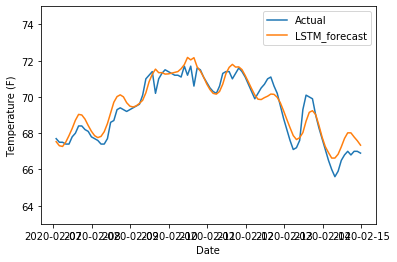

In [34]:
plt.plot(ts.index[276:372],inv_y,label='Actual')
plt.plot(ts.index[276:372],inv_yhat,label='LSTM_forecast')
plt.legend(loc="upper right")
plt.ylim(63,75)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')

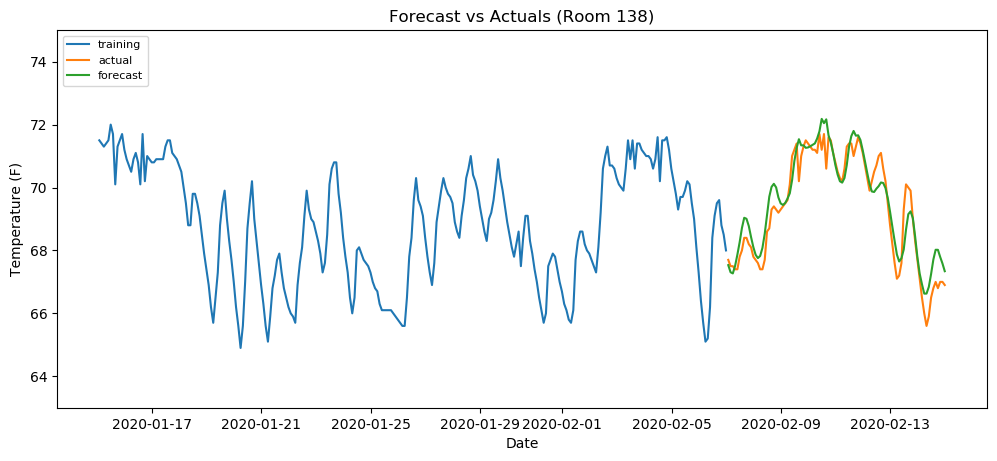

In [35]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(ts.index[:276],inv_y_train, label='training')
plt.plot(ts.index[276:372],inv_y, label='actual')
plt.plot(ts.index[276:372],inv_yhat, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals (Room 138)')
plt.legend(loc='upper left', fontsize=8)
plt.ylim(63,75)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.show()

# Linear regression

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
regressor = LinearRegression()

In [38]:
train_X_lr, train_y_lr = train[:, :-1], train[:, -1]
test_X_lr, test_y_lr = test[:, :-1], test[:, -1]

In [39]:
regressor.fit(train_X_lr,train_y_lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_pred= regressor.predict(test_X_lr)

In [41]:
#Invert scaling for forecast
testy_forecast_lr = np.zeros(shape=(len(test_y_lr), 5))

testy_forecast_lr[:,0] = y_pred

inv_yhat_lr = scaler.inverse_transform(testy_forecast_lr)[:,0]

In [42]:
inv_yhat_lr.shape

(96,)

In [43]:
#Invert scaling for actual
# invert scaling for actual

testy_actual_lr = np.zeros(shape=(len(test_y_lr), 5))

testy_actual_lr[:,0] = test_y_lr

inv_y_lr = scaler.inverse_transform(testy_actual_lr)[:,0]

In [44]:
inv_y_lr

array([67.7, 67.5, 67.5, 67.4, 67.4, 67.8, 68. , 68.4, 68.4, 68.2, 68.1,
       67.8, 67.7, 67.6, 67.4, 67.4, 67.7, 68.6, 68.7, 69.3, 69.4, 69.3,
       69.2, 69.3, 69.4, 69.5, 69.6, 70.1, 71. , 71.2, 71.4, 70.2, 71. ,
       71.3, 71.5, 71.4, 71.3, 71.2, 71.2, 71.1, 71.7, 71.2, 71.7, 70.6,
       71.6, 71.5, 71.1, 70.8, 70.5, 70.3, 70.2, 70.6, 71.3, 71.4, 71.4,
       71. , 71.3, 71.6, 71.4, 71.1, 70.7, 70.3, 69.9, 70.2, 70.5, 70.7,
       71. , 71.1, 70.6, 70.2, 69.5, 68.8, 68.2, 67.6, 67.1, 67.2, 67.6,
       69.3, 70.1, 70. , 69.9, 69. , 68.3, 67.7, 67.1, 66.5, 66. , 65.6,
       65.9, 66.5, 66.8, 67. , 66.8, 67. , 67. , 66.9])

Text(0, 0.5, 'Temperature (F)')

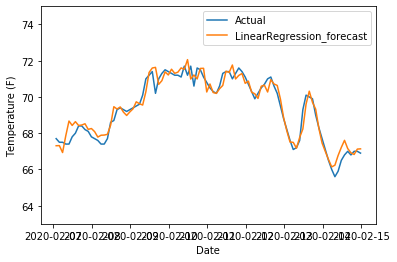

In [45]:
plt.plot(ts.index[276:372],inv_y_lr,label='Actual')
plt.plot(ts.index[276:372],inv_yhat_lr,label='LinearRegression_forecast')
plt.legend(loc="upper right")
plt.ylim(63,75)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')

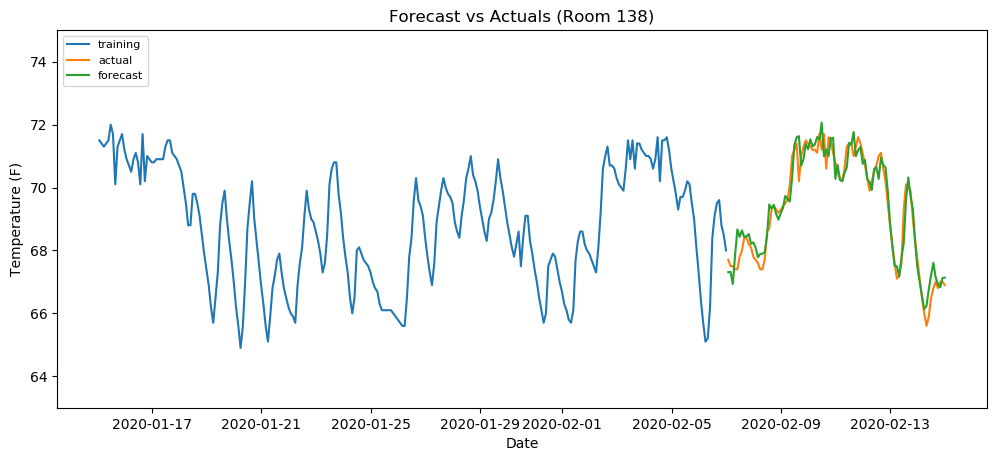

In [46]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(ts.index[:276],inv_y_train, label='training')
plt.plot(ts.index[276:372],inv_y_lr, label='actual')
plt.plot(ts.index[276:372],inv_yhat_lr, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals (Room 138)')
plt.legend(loc='upper left', fontsize=8)
plt.ylim(63,75)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.show()

In [47]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_lr, inv_yhat_lr))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.433
